<a href="https://colab.research.google.com/github/abdullahsaqib112/NewsWires-Classification-Reuters-Dataset/blob/main/Classifying_Newswires_Multi_classification_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=10000)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [18]:
len(train_data)

8982

In [19]:
len(test_data)

2246

In [20]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results= np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [21]:
def to_one_hot (sequences, dimension=46):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1

  return results

one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [22]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [23]:
from keras import models
from keras import layers

model= models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [24]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
x_val=x_train[:1000]
partial_x_val = x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_val=one_hot_train_labels[1000:]

In [26]:
history= model.fit(partial_x_val,
                   partial_y_val,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 54ms/step - loss: 3.1541 - accuracy: 0.3693 - val_loss: 1.7953 - val_accuracy: 0.6290
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.5563 - accuracy: 0.6873 - val_loss: 1.3810 - val_accuracy: 0.7000
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 1.1716 - accuracy: 0.7466 - val_loss: 1.1705 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.8837 - accuracy: 0.8139 - val_loss: 1.0720 - val_accuracy: 0.7730
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.7160 - accuracy: 0.8523 - val_loss: 0.9970 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5618 - accuracy: 0.8825 - val_loss: 0.9627 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 1s 43ms/step - loss: 0.4448 - accuracy: 0.9117 - val_loss: 0.9169 - val_accuracy: 0.8200
Epoch 8/20
16

In [27]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

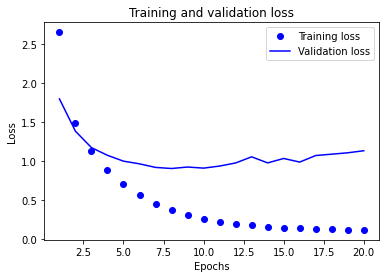

In [28]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

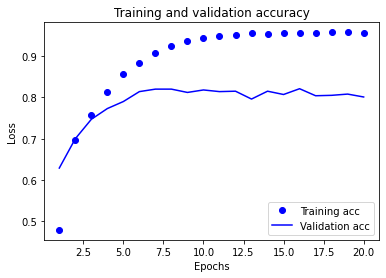

In [29]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
#retraining a model from scratch and decreasing number of epochs 
#as we can see in plots that accuracy drops after 9th epoch

from keras import models
from keras import layers

model= models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_val,
          partial_y_val,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))



Epoch 1/9
16/16 [==============================] - 1s 54ms/step - loss: 3.0867 - accuracy: 0.4120 - val_loss: 1.7032 - val_accuracy: 0.6580
Epoch 2/9
16/16 [==============================] - 1s 43ms/step - loss: 1.4583 - accuracy: 0.6917 - val_loss: 1.2858 - val_accuracy: 0.7150
Epoch 3/9
16/16 [==============================] - 1s 46ms/step - loss: 1.0468 - accuracy: 0.7748 - val_loss: 1.1515 - val_accuracy: 0.7600
Epoch 4/9
16/16 [==============================] - 1s 43ms/step - loss: 0.8092 - accuracy: 0.8319 - val_loss: 1.0278 - val_accuracy: 0.7840
Epoch 5/9
16/16 [==============================] - 1s 44ms/step - loss: 0.6388 - accuracy: 0.8663 - val_loss: 0.9685 - val_accuracy: 0.7930
Epoch 6/9
16/16 [==============================] - 1s 43ms/step - loss: 0.5141 - accuracy: 0.8914 - val_loss: 0.9212 - val_accuracy: 0.7960
Epoch 7/9
16/16 [==============================] - 1s 43ms/step - loss: 0.3975 - accuracy: 0.9174 - val_loss: 0.9018 - val_accuracy: 0.8090
Epoch 8/9
16/16 [===

In [38]:
reults=model.evaluate(x_test,one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 0.9888 - accuracy: 0.7827


In [40]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19456812110418523

In [41]:
predictions = model.predict(x_test)

In [43]:
predictions[0].shape

(46,)

In [44]:
#Experiments trying different number of layers 

from keras import models
from keras import layers

model= models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_val,
          partial_y_val,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))

Epoch 1/9
16/16 [==============================] - 2s 71ms/step - loss: 3.5760 - accuracy: 0.1978 - val_loss: 2.9895 - val_accuracy: 0.5210
Epoch 2/9
16/16 [==============================] - 1s 43ms/step - loss: 2.8417 - accuracy: 0.5065 - val_loss: 2.5033 - val_accuracy: 0.5400
Epoch 3/9
16/16 [==============================] - 1s 43ms/step - loss: 2.3503 - accuracy: 0.5399 - val_loss: 2.1820 - val_accuracy: 0.5600
Epoch 4/9
16/16 [==============================] - 1s 43ms/step - loss: 2.0183 - accuracy: 0.5777 - val_loss: 1.9566 - val_accuracy: 0.5790
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 1.7563 - accuracy: 0.6025 - val_loss: 1.7865 - val_accuracy: 0.6170
Epoch 6/9
16/16 [==============================] - 1s 43ms/step - loss: 1.5908 - accuracy: 0.6358 - val_loss: 1.6817 - val_accuracy: 0.6130
Epoch 7/9
16/16 [==============================] - 1s 43ms/step - loss: 1.4594 - accuracy: 0.6469 - val_loss: 1.6048 - val_accuracy: 0.6250
Epoch 8/9
16/16 [===

In [45]:
reults=model.evaluate(x_test,one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.6076 - accuracy: 0.6189
